<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

# **Predicción del precio de hospedajes en Airbnb para la ciudad de Nueva York**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que usted pueda desarrollar algunas tareas de limpieza para asegurar la calidad del análisis. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Añada comentarios al código para que documente sus soluciones. 
* Coloque su análisis en una celda de Texto luego de cada resultado.
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html


## Instalar, actualizar y cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [26]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.8.5
NumPy 1.23.0
Pandas 1.4.3
Matplotlib 3.5.2
Seaborn 0.11.2


Este caso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```

## Cargar el dataset de trabajo

In [27]:
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/airbnb.csv?raw=true', delimiter=',')
airbnb.head(3)

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


In [28]:
# Dimensiones del dataframe
airbnb.shape

(30179, 76)

In [29]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   transit                                       18190 non-null  object 
 3   host_id                                       30179 non-null  int64  
 4   host_since                                    30170 non-null  float64
 5   host_response_time                            17082 non-null  object 
 6   host_response_rate                            17082 non-null  float64
 7   host_is_superhost                             30170 non-null  float64
 8   host_listings_count                           30170 non-null  float64
 9   host_identity_verified                        30170 non-null 

## **Errores y datos atípicos**

En la fase de exploración previa identificamos algunas incongruencias en las variables price y bathrooms. Para la variable price encontramos hospedajes con precios desde 0 dólares, y a su vez tenemos algunos atípicos muy lejos del cuartil 75 y el bígote superior. Vea el boxplot para el precio.

Por otro lado, la variable bathrooms presenta valores decimales, 0.5 y 7.5 que podemos ver en el resumen estadístico. Si bien es extraño pensar en cantidad de baños como un valor decimal es muy común encontrar la notación 0.5 en estos escenarios. 0.5 representa un baño que solo tiene cisterna y lavamanos, pero que no tiene ducha. 1.0 representa un baño con ducha, cisterna y lavamanos.

In [30]:
airbnb[['price','bathrooms']].describe()

,price,bathrooms
count,30179.000000,30179.000000
mean,132.949965,1.151595
std,93.151824,0.422225
min,0.000000,0.500000
25%,65.000000,1.000000
50%,100.000000,1.000000
75%,175.000000,1.000000
max,500.000000,7.500000


<AxesSubplot:xlabel='price'>

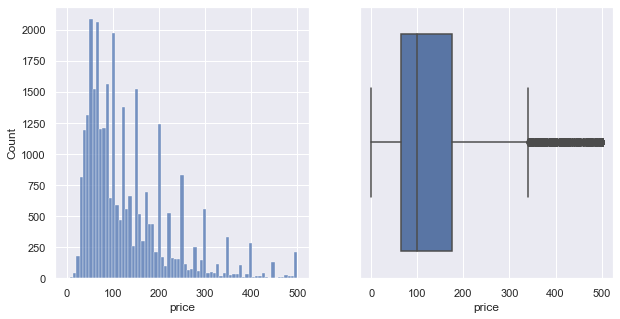

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = airbnb, x='price', ax = ax[0])
sns.boxplot(data = airbnb, x='price', ax = ax[1])

### Ejercicio 1

Cree un subconjunto con el nombre `atipicos_precio` que contenga las observaciones consideradas atípicos severos de acuerdo al boxplot del precio. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Use un filtro para seleccionar las observaciones que cumplan el criterio (en el taller guiado de Pandas puede encontrar información útil- selección de variables).
* Los atípicos severos son las observaciones que quedan por fuera de los bígotes.
* Los bígotes pueden tener una longitud máxima de 1.5*IQ, donde IQ es el rango intercuartílico. [Aquí](https://www.data-to-viz.com/caveat/boxplot.html) puede encontrar más información.
* `atipicos_precio` debe tener dimensiones (1430, 76).



In [32]:
# Respuesta


### Ejercicio 2 (difícil)
Analicemos el subconjunto `atipicos_precio`.
* ¿Cuántos hospedajes hay en el subconjunto?
* Construya un histograma para la variable precio. Describa la distribución.
* Haga un análisis de las variables bedrooms, bathrooms. En comparación con la distribución general ¿aprecia alguna diferencia?
* Analice la ubicación de los lugares y compare con la distribución general que analizamos en la primera fase. ¿Observa algún patrón?

Si tuvo problemas con el Ejercicio 1, no se preocupe, a continuación se carga el dataset producto del primer ejercicio.



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Compare las distribuciones de los baños y habitaciones en el conjunto general `airbnb` y en el subconjunto `atipicos_precio`.
* Haga un jointplot para comparar la distribución de la variable ubicación en el subconjunto `atipicos_precio` con respecto a la visualización obtenida en la fase 1.

In [33]:
atipicos_precio = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/atipicos_precio.csv?raw=true').drop(columns = ['Unnamed: 0'])
print('Las dimensiones de atipicos_precio son: {}'.format(atipicos_precio.shape))

Las dimensiones de atipicos_precio son: (1430, 76)


In [34]:
# Respuesta


In [35]:
# Respuesta


Esta es la distribución de la ubicación que obtuvimos en la fase anterior.

<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/data/distribucion_general_ubicacion.png?raw=true" alt = "Encabezado" width = "50%">  </img>


In [36]:
# Respuesta


### Ejercicio 3

A partir del análisis del ejercicio anterior concluya. ¿Considera que los datos del subconjunto `atipicos_precio` son errores y deben ser eliminados? ¿Cuál considera una razón importante para el aumento significativo de los precios?

Respuesta

### Ejercicio 4

Partiendo del dataset general `airbnb` cree un subconjunto con los hospedajes con precio menor o igual a 10 dólares/noche. ¿Cuántos hospedajes tiene el nuevo subconjunto? ¿Cuántos hospedajes tienen un precio de 0 dólares/noche?
¿Cuántos hospedajes tienen un precio de 10 dólares/noche? 

Basado en la exploración anterior responda: 
* ¿Cuál es el precio mínimo de un hospedaje en la ciudad de Nueva York? 
* Sugiera alternativas para lidiar con los hospedajes con precio 0.


In [37]:
# Respuesta


### Ejercicio 5

Elimine los hospedajes con precio igual a cero. Cree un dataframe llamado `airbnb2` con esta modificación, deberá tener 30173 observaciones y las mismas 76 variables.



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

Existen diferentes formas para eliminar registros usando una condición.
1. Haga un filtro que guarde los hospedajes con precio diferente de 0.
2. Obtenga los índices de las observaciones con precio igual a cero y utilice el método `.drop` para eliminarlas.

In [38]:
# Respuesta


## **Valores nulos**

Una de las tareas obligatorias en esta fase de limpieza es detectar y explorar los valores nulos. Haga esa inspección con el dataframe `airbnb2` que acabamos de crear .

### Ejercicio 6

Obtenga una tabla de frecuencia con las 20 variables con mayor cantidad de valores nulos. Calcule el porcentaje de valores nulos para cada variable.
Responda las siguientes preguntas:
* Proponga soluciones para el problema de las variables con más de 25% de valores nulos.
* Considere la variable neighbourhood, en la fase pasada encontramos que es una variable determinante en el precio, plantee soluciones para hacer el relleno de valores faltantes presentes en esta variable.

Recuerde justificar su propuesta usando los recursos vistos en clase.


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice el método `.isnull()` este dará como resultado un booleano para cada valor dentro del DataFrame `airbnb2`.
* Otros métodos útiles: `.sum()`, `sort_values()`





In [39]:
# Respuesta


### Ejercicio 7

Basado en su propuesta del ejercicio 6, ejecute las soluciones que estén dentro de su alcance técnico. Al menos una de ellas.


In [40]:
# Respuesta


## **Transformación de variables**

Ya hemos lidiado con datos atípicos y valores faltantes. Ahora procedamos a transformar nuestras características según las necesidades de cada variable. Vamos a seleccionar 11 variables para crear nuestro modelo basados en los análisis exploratorios realizados previamente. Recuerde, la variable objetivo es el precio. En la fase 3 construiremos un modelo que nos permita predecir el precio a partir de 10 variables predictoras. Vamos a preparar nuestros datos con ese propósito.

Para garantizar que todos trabajemos con los mismos datos, a continuación se entrega un dataset filtrado sin datos nulos y sin atípicos severos.

In [41]:
clean = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/clean_airbnb.csv?raw=true')
clean.head()

,price,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,host_is_superhost,parking
0,149,Brooklyn,40.64749,-73.97237,Apartment,Private room,1.0,1,1,0.0,1
1,150,Harlem,40.80902,-73.94190,Apartment,Private room,1.0,1,1,0.0,-1
2,190,Harlem,40.79685,-73.94872,Apartment,Entire home/apt,1.0,2,2,0.0,-1
3,60,Brooklyn,40.65599,-73.97519,Condominium,Private room,1.0,1,1,1.0,1
4,80,Manhattan,40.86754,-73.92639,Apartment,Private room,1.0,1,1,0.0,1


In [42]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30173 entries, 0 to 30172
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              30173 non-null  int64  
 1   neighbourhood      30173 non-null  object 
 2   latitude           30173 non-null  float64
 3   longitude          30173 non-null  float64
 4   property_type      30173 non-null  object 
 5   room_type          30173 non-null  object 
 6   bathrooms          30173 non-null  float64
 7   bedrooms           30173 non-null  int64  
 8   beds               30173 non-null  int64  
 9   host_is_superhost  30173 non-null  float64
 10  parking            30173 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 2.5+ MB


### Ejercicio 8

Examine cada una de las variables seleccionadas. Su tipología computacional (int, float, object) y su tipología estadística (ordinal, nominal, continúa, discreta). Seleccione la transformación más apropiada para cada variable, asegúrese de incluir todas las variables en alguna lista. Solo debe escribir el nombre de la variable dentro de la lista, por ejemplo:

```
lista = ['price', 'bedrooms']
```



In [43]:
# Respuesta

sin_transformacion = []
dummy_var = []
ordinal_encoding = []
normalizacion = []
estandarizacion = []

## Variables categóricas

Recuerde que la transformación de variables categóricas o tipo object es obligatoria a la hora de construir modelos, los algoritmos de Machine Learning NO entienden los strings como `'condominio' 'Brooklyn' 'Manhattan'`. Es por eso que debemos numerizar estas variables.





In [44]:
# Filtremos las variables tipo object

clean_object = clean.select_dtypes(include = 'object')
clean_object.head()

,neighbourhood,property_type,room_type
0,Brooklyn,Apartment,Private room
1,Harlem,Apartment,Private room
2,Harlem,Apartment,Entire home/apt
3,Brooklyn,Condominium,Private room
4,Manhattan,Apartment,Private room


Consideremos ahora los niveles que pueden tomar cada una de las variables.

In [45]:
for variable in clean_object.columns:
  niveles = clean_object[variable].nunique()
  print('La variable {}, tiene {} niveles.'.format(variable,niveles))

La variable neighbourhood, tiene 186 niveles.
La variable property_type, tiene 33 niveles.
La variable room_type, tiene 3 niveles.


Las 3 variables son cualitativas ordinales, por lo que una transformación tipo dummy sería lo más apropiado, sin embargo, sí hacemos esto crearíamos un dataframe con 222 variables adicionales, esto puede entorpecer el trabajo con el dataframe. Por lo cual haremos lo siguiente:
1. Aplicar la transformación dummy a la variable room_type.
2. Aplicar ordinal encoding a las variables neighbourhood y property_type.

### Ejercicio 9

Aplique la transformación dummy sobre el dataframe `clean` solamente para la variable room_type. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice la función de pandas `pd.get_dummies()`.
* Use el parámetro `column` para indicar cual columna debe ser transformada. Para más información consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [46]:
# Respuesta


### Ejercicio 10

Aplique la transformación ordinal sobre las variables neighbourhood y property_type. Nombre su tranformador ordinal como `encoder`. Guarde el resultado en un objeto llamado `ord_vars`.




In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Respuesta


### Ejemplo 1

Más información acerca de los codificadores Ordinales, solo ejecute el resto de este código cuando haya obtenido la respuesta de arriba.

El método Ordinal Encoder de scikitlearn organiza las categorías en orden alfabético. A continuación se muestra el objeto que contiene la información sobre la codificación.

In [48]:
encoder.categories_

# Retorna dos listas con dos arreglos de numpy
# Cada arreglo contiene las categorías de cada variable transformada

NameError: name 'encoder' is not defined

Creemos diccionarios en formato csv con la codificación de ambas variables. El proceso de documentación es clave en el proyecto.

In [ ]:
# Extraemos el arreglo relacionado con los barrios

categories_neigh = encoder.categories_[0]

# Creamos una lista con números igual a la longitud del arreglo de los barrios

neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con los barrios y códigos

barrios = pd.DataFrame({'codigo': neigh_codes,
                        'barrio': categories_neigh})

# Creamos un archivo csv para la documentación del proceso

barrios.to_csv('Diccionario barrios airbnb.csv')

barrios.head()


,codigo,barrio
0,0,Allerton
1,1,Alphabet City
2,2,Annadale
3,3,Astoria
4,4,Bath Beach


In [ ]:

# Extraemos el arreglo relacionado con el tipo de propiedad

categories_property = encoder.categories_[1]

# Creamos una lista con números igual a la longitud del arreglo de los tipos de propiedad

property_codes = [i for i in range(len(categories_property))]

# Creamos un dataframe con los tipos de propiedad y códigos

propiedades = pd.DataFrame({'codigo': property_codes,
                        'barrio': categories_property})

# Creamos un archivo csv para la documentación del proceso

propiedades.to_csv('Diccionario tipos de propiedad airbnb.csv')
propiedades.head()



,codigo,barrio
0,0,Aparthotel
1,1,Apartment
2,2,Barn
3,3,Bed and breakfast
4,4,Boat


Para finalizar, reemplazamos las variables transformadas en nuestro dataframe original. Y damos un vistazo a nuestro dataframe con todas las variables codificadas como númericas.

In [ ]:
# Convertimos el arreglo de numpy en un dataframe

ord_vars = pd.DataFrame(ord_vars,columns = ['neighbourhood','property_type'])
ord_vars.head()

,neighbourhood,property_type
0,18.0,1.0
1,80.0,1.0
2,80.0,1.0
3,18.0,12.0
4,101.0,1.0


In [ ]:
# Reemplazamos en nuestro dataset original

for variable in ord_vars.columns:
  clean[variable] = ord_vars[variable]

clean.head()

,price,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,18.0,40.64749,-73.97237,1.0,1.0,1,1,0.0,1,0,1,0
1,150,80.0,40.80902,-73.94190,1.0,1.0,1,1,0.0,-1,0,1,0
2,190,80.0,40.79685,-73.94872,1.0,1.0,2,2,0.0,-1,1,0,0
3,60,18.0,40.65599,-73.97519,12.0,1.0,1,1,1.0,1,0,1,0
4,80,101.0,40.86754,-73.92639,1.0,1.0,1,1,0.0,1,0,1,0


### Ejercicio 11

Observe la variables parking y host_is_superhost son binarias. Solo toman valores de Falso (0) y Verdadero (1). Sin embargo, la variable parking tiene una codificación extraña con -1 como código de Falso, lo cual que puede ocasionar algunos inconvenientes. Encuentre todos los campos de la variable parking que contengan -1.0 y reemplacelos por 0.0. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice el método de pandas `.map()`.
* Para más información consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [ ]:
# Respuesta


,price,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,18.0,40.64749,-73.97237,1.0,1.0,1,1,0.0,1.0,0,1,0
1,150,80.0,40.80902,-73.94190,1.0,1.0,1,1,0.0,0.0,0,1,0
2,190,80.0,40.79685,-73.94872,1.0,1.0,2,2,0.0,0.0,1,0,0
3,60,18.0,40.65599,-73.97519,12.0,1.0,1,1,1.0,1.0,0,1,0
4,80,101.0,40.86754,-73.92639,1.0,1.0,1,1,0.0,1.0,0,1,0


### Ejercicio 12

Para finalizar, escriba algunas conclusiones de sus hallazgos y haga una lista cronológica con todas las modificaciones que se hicieron hasta obtener el dataframe clean final. Si tiene ideas adicionales que no hayamos ejecutado en este análisis por favor incluyalas en forma de recomendación para la siguiente iteración del proceso. 



Respuesta

**Aquí termina la segunda fase del proyecto, ya conocemos bastante nuestros datos y tenemos un conjunto limpio y preparado para la fase de modelamiento. En la siguiente fase vamos a utilizar dos algoritmos de Machine Learning para construir 2 modelos, haremos el proceso de experimentación para optimizar los errores y extraeremos información valiosa de nuestros modelos.**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*